In [1]:
from requests import get
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium

In [2]:
url = "https://data.cityofchicago.org/resource/crimes.json?$order=date%20DESC&$limit=1250000"
response = get(url, headers={"X-App-Token":"eQexwCiZsieQyjfCAdnzDBlUs"})
print(response.status_code)

200


In [3]:
def get_info():
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None

data = get_info()

In [4]:
Crime = pd.DataFrame(data)

In [14]:
Crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1210326 entries, 122 to 1249999
Data columns (total 22 columns):
arrest                  1210326 non-null bool
beat                    1210326 non-null object
block                   1210326 non-null object
case_number             1210326 non-null object
community_area          1210326 non-null object
date                    1210326 non-null object
description             1210326 non-null object
district                1210326 non-null object
domestic                1210326 non-null bool
fbi_code                1210326 non-null object
id                      1210326 non-null object
iucr                    1210326 non-null object
latitude                1210326 non-null float64
location                1210326 non-null object
location_description    1210326 non-null object
longitude               1210326 non-null float64
primary_type            1210326 non-null object
updated_on              1210326 non-null object
ward                   

In [6]:
Crime.date.min(), Crime.date.max()

('2014-09-26T17:45:00.000', '2019-06-15T23:57:00.000')

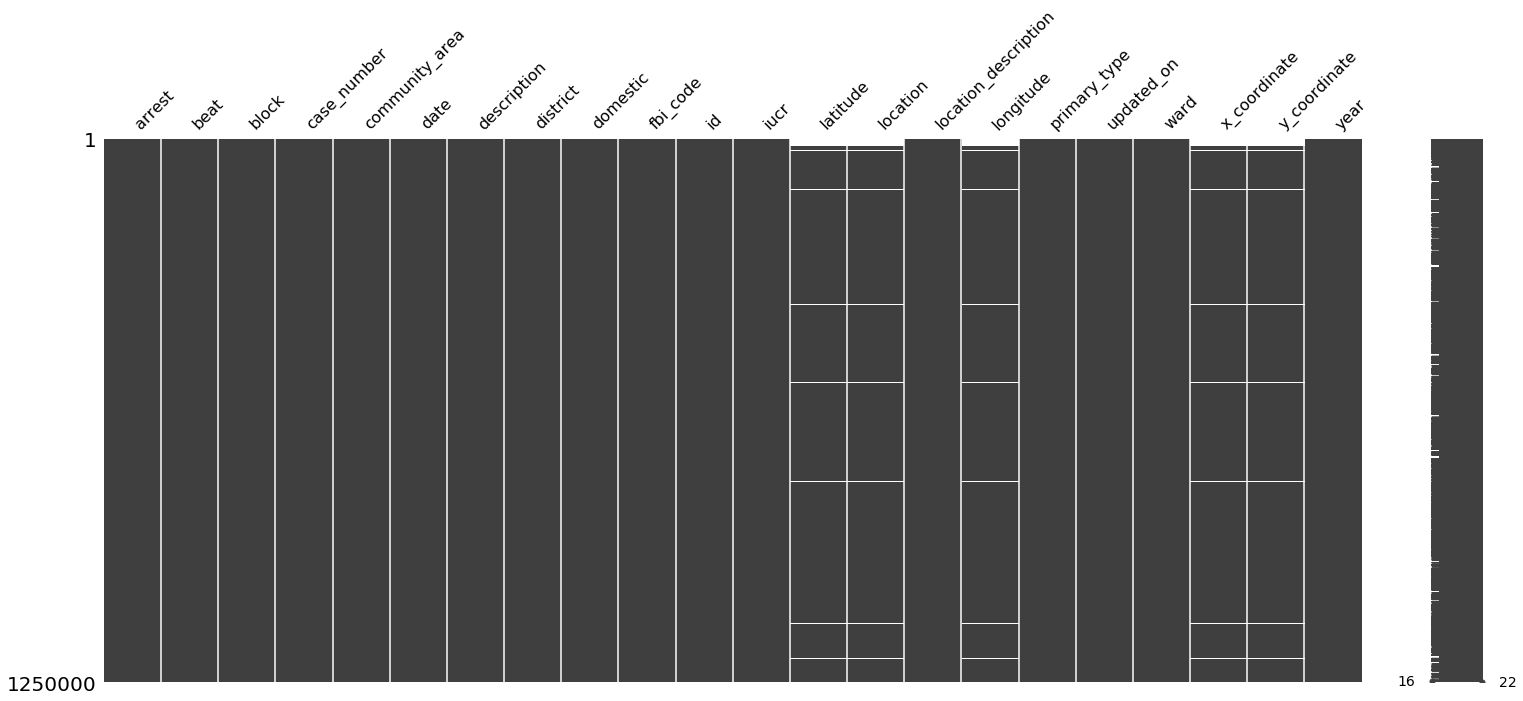

In [7]:
msno.matrix(Crime)

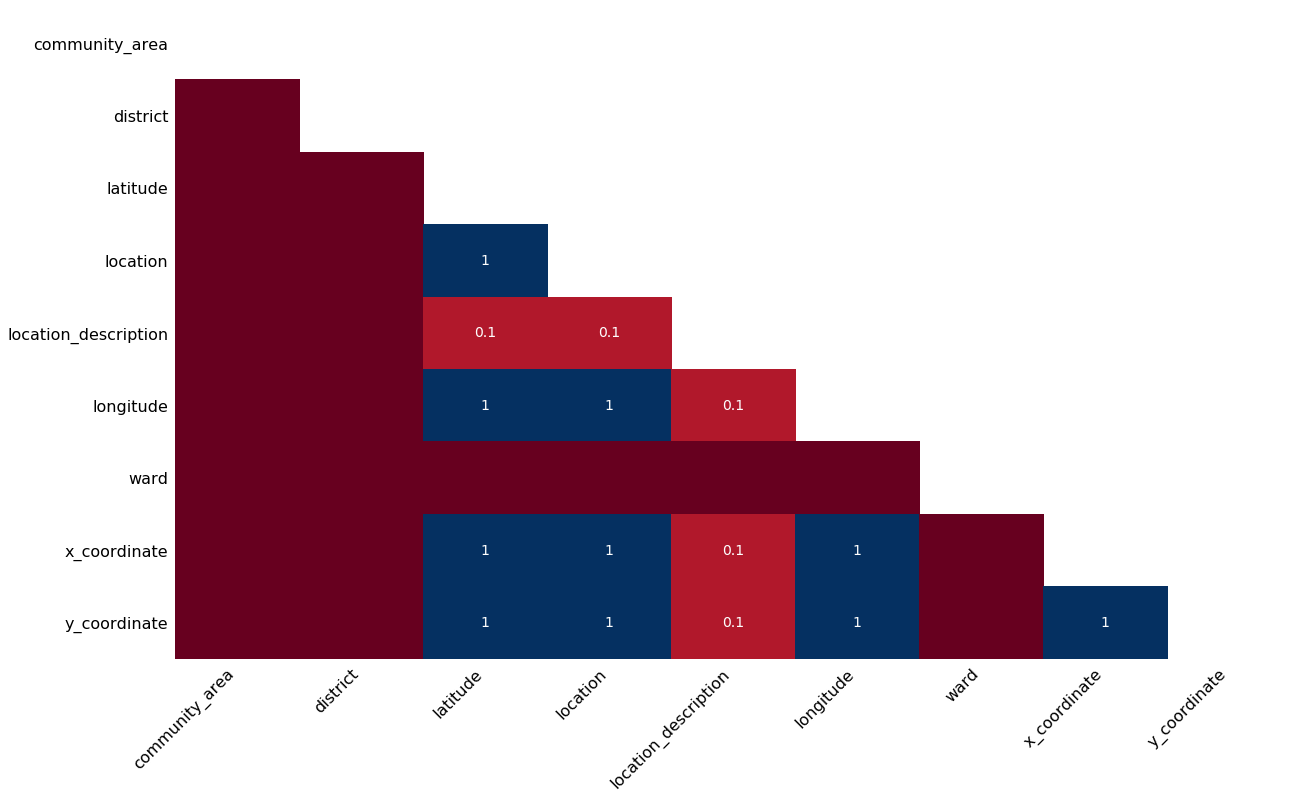

In [8]:
msno.heatmap(Crime)

In [109]:
Crime.head()

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
122,False,0832,022XX W 68TH ST,JC308069,66,2019-06-15T20:35:00.000,FIRST DEGREE MURDER,008,False,01A,...,41.770183,"{'latitude': '41.770182969', 'longitude': '-87...",ALLEY,-87.680170,HOMICIDE,2019-06-22T16:09:32.000,16,1162426,1859522,2019
571,False,1532,002XX N LEAMINGTON AVE,JC306523,25,2019-06-15T08:02:00.000,FIRST DEGREE MURDER,015,False,01A,...,41.884897,"{'latitude': '41.884897329', 'longitude': '-87...",STREET,-87.754014,HOMICIDE,2019-06-22T16:09:32.000,28,1142000,1901179,2019
607,False,0624,078XX S INGLESIDE AVE,JC307166,69,2019-06-15T06:14:00.000,FIRST DEGREE MURDER,006,False,01A,...,41.752266,"{'latitude': '41.752266466', 'longitude': '-87...",STREET,-87.601569,HOMICIDE,2019-06-22T16:09:32.000,8,1183923,1853166,2019
1702,False,1122,036XX W SCHRAEDER DR,JC305090,27,2019-06-13T18:35:00.000,FIRST DEGREE MURDER,011,False,01A,...,41.883903,"{'latitude': '41.88390335', 'longitude': '-87....",STREET,-87.717517,HOMICIDE,2019-06-20T16:23:46.000,28,1151941,1900886,2019
2173,True,2522,048XX W FULLERTON AVE,JC304063,19,2019-06-13T00:15:00.000,FIRST DEGREE MURDER,025,False,01A,...,41.924228,"{'latitude': '41.924228431', 'longitude': '-87...",RETAIL STORE,-87.747118,HOMICIDE,2019-06-21T15:58:54.000,31,1143780,1915524,2019


In [9]:
Crime.dropna(inplace=True)
Crime.latitude = Crime.latitude.astype(float)
Crime.longitude = Crime.longitude.astype(float)

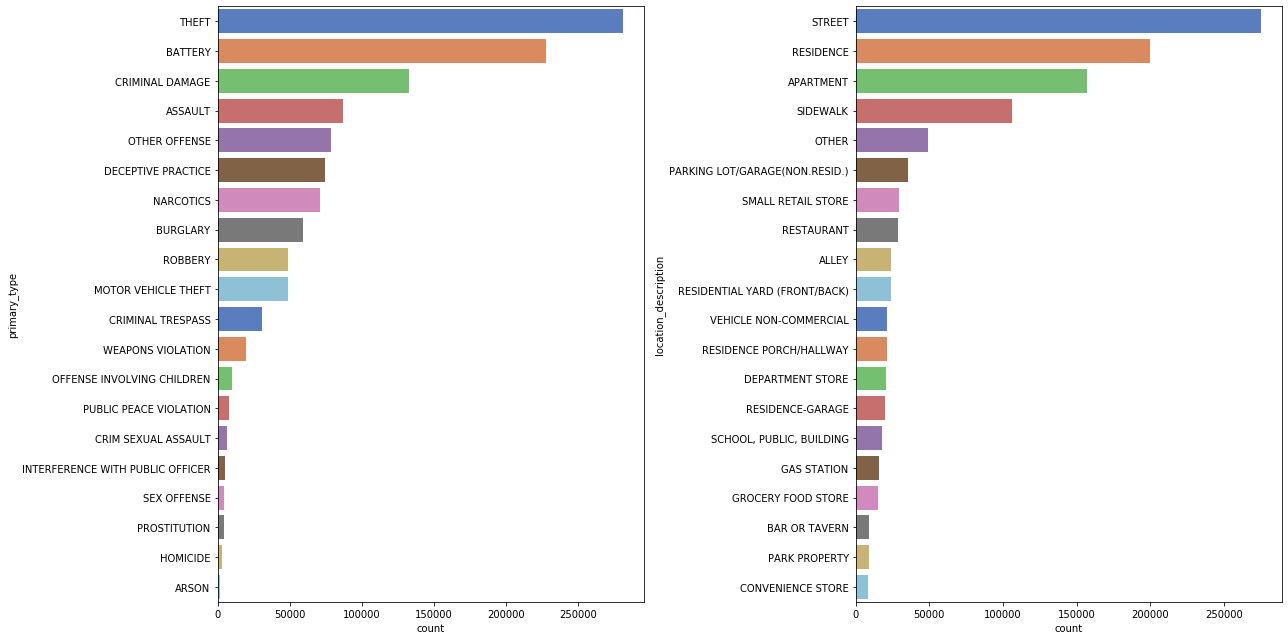

In [10]:
fig, ax =plt.subplots(1,2, figsize=(18,9))

sns.countplot(y= 'primary_type', data = Crime, palette = 'muted', order = Crime['primary_type'].value_counts().iloc[:20].index, ax=ax[0])
sns.countplot(y= 'location_description', data = Crime, palette = 'muted', order = Crime['location_description'].value_counts().iloc[:20].index, ax=ax[1])
plt.tight_layout()
plt.show()


In [69]:

Chi_Coordinates = (41.8781, -87.6298)
map = folium.Map(location=Chi_Coordinates, zoom_start=12)

In [70]:
for x in range(1000):
    lat = Crime.iloc[x].latitude
    lon = Crime.iloc[x].longitude
    folium.CircleMarker(location = [lat, lon], popup=Crime.iloc[x].primary_type, radius = 2).add_to(map)
    
map

In [108]:
mapa = folium.Map(location=Chi_Coordinates, zoom_start=12)
for x in Crime[Crime.primary_type=="PROSTITUTION"].iterrows():
    lat = x[1][12]
    lon = x[1][15]
    folium.CircleMarker(location = [lat, lon], popup=x[1][0], radius = 2).add_to(mapa)
mapa.save(outfile= "hookers.html")

In [110]:
mapb = folium.Map(location=Chi_Coordinates, zoom_start=12)
for x in Crime[Crime.primary_type=="NARCOTICS"].iterrows():
    lat = x[1][12]
    lon = x[1][15]
    folium.CircleMarker(location = [lat, lon], popup=x[1][0], radius = 2).add_to(mapb)
mapb.save(outfile= "drugs.html")